## Project/ Business Goals
* Understand about the data
* Create a unsupervised models and group the data into into clusters
* Create all the models suitable for this purpose and compare these models

In [1]:
# pip install yellowbrick

In [2]:
# Importing the required library

# Numpy and Pandas
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import plot_tree
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer
import scipy.cluster.hierarchy as sch

# Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

# Models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering,DBSCAN

# Evaluation Metrics
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Data imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

### Importing and Understanding the data

In [3]:
df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### EDA

### Univariate - Distribution of all the Numerical column

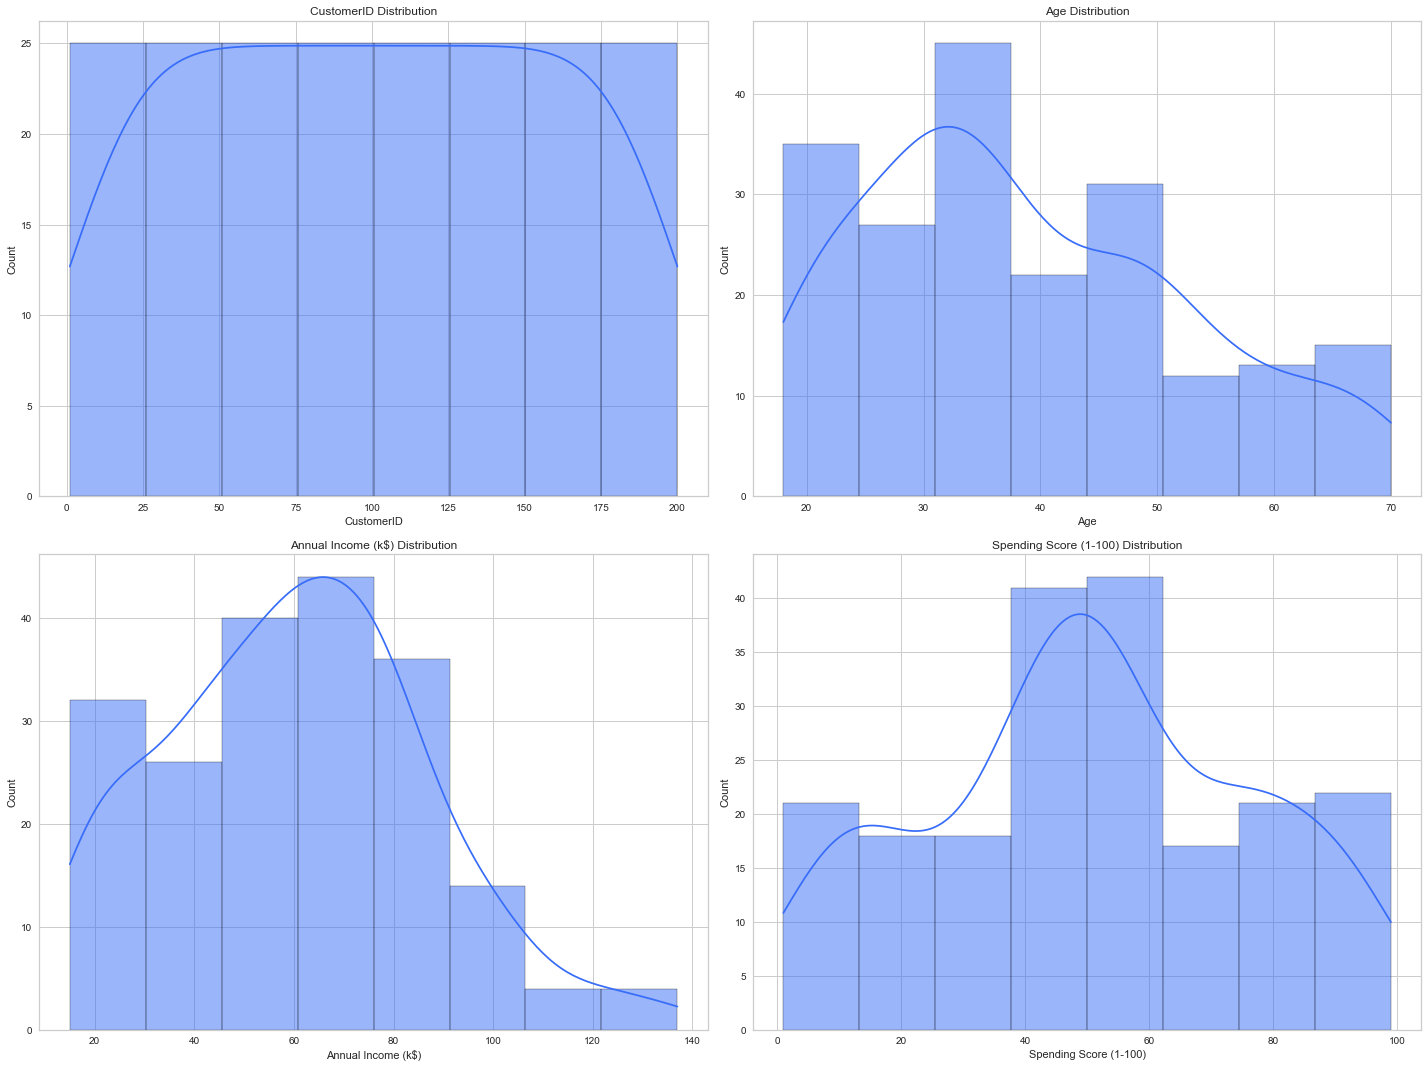

In [7]:
fig,ax = plt.subplots(1,2,figsize = (20,15))
color = sb.color_palette('rainbow')[0:1]

columns = ['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']
a = 1
for i in columns:
    plt.subplot(2,2,a)
    sb.histplot(x = df[i],color=color,kde=True,bins = 8)
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* The **distribution of all the numerical column** can be seen above
* **Customer id** has **uniform distribution**
* **Age and Annual income** have **right skewed data**
* **Spending score** is **normally distributed**

### Univarite - Understanding about the outliers

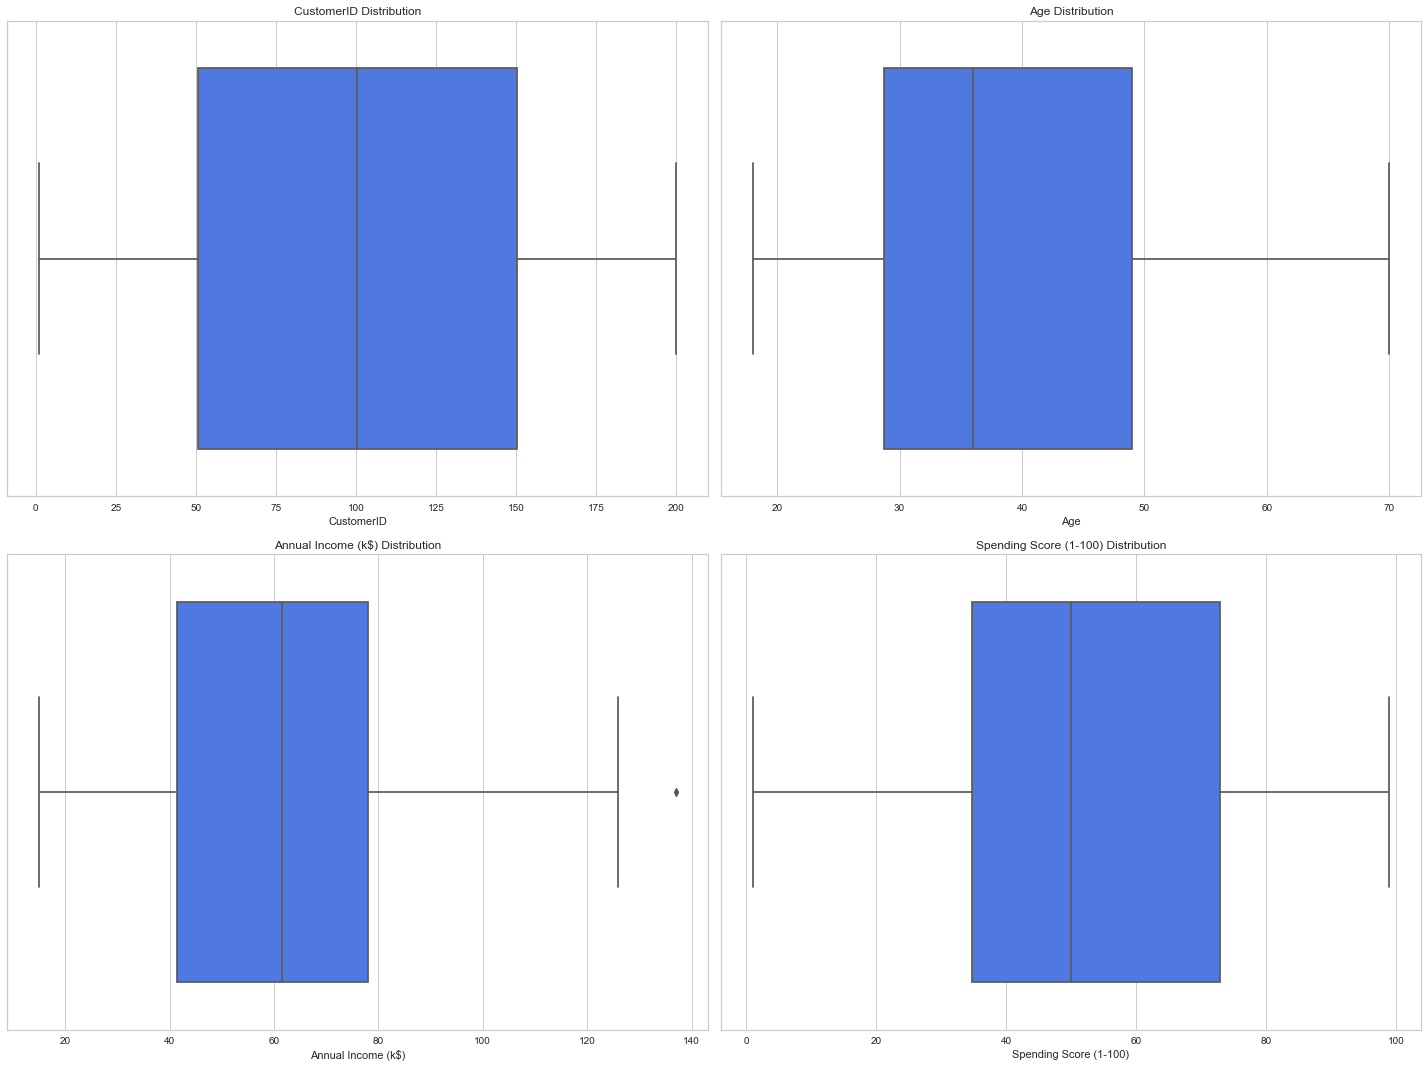

In [8]:
fig,ax = plt.subplots(1,2,figsize = (20,15))
color = sb.color_palette('rainbow')[0:1]

columns = ['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']
a = 1
for i in columns:
    plt.subplot(2,2,a)
    sb.boxplot(x = df[i],palette=color)
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* **One outlier** is present in the **Annual Income**
* Other than that we can understand that there are **no outliers in the data**

### Univariate - Categorical column

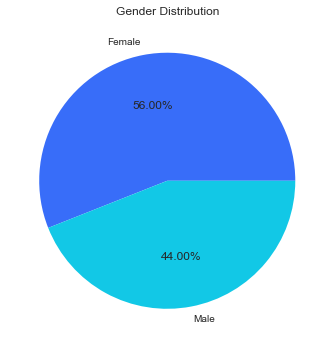

In [9]:
fig,ax = plt.subplots(figsize = (8,5))

data = df['Gender'].value_counts()
label = data.keys()
plt.pie(data,labels=label,autopct='%.2f%%',colors=sb.color_palette('rainbow'))
plt.title('Gender Distribution')


plt.tight_layout()
plt.show()

* There are **more number of Female Customers** than male customers

### Bivariate Analysis Based on Gender

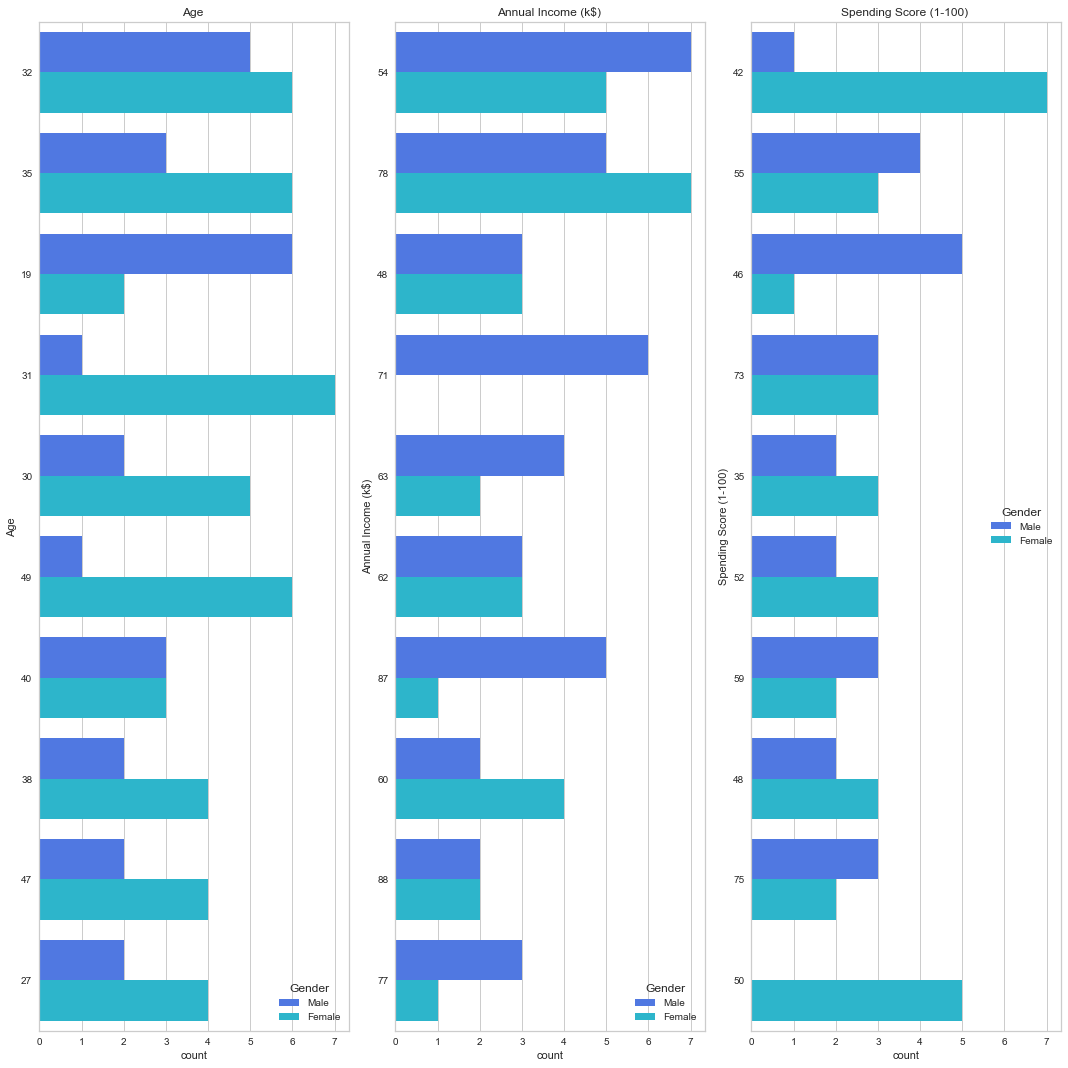

In [10]:
fig,ax = plt.subplots(figsize = (15,15))
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
b = 1

for i in columns:
    plt.subplot(1,3,b)
    sb.countplot(y = df[i],hue=df['Gender'],palette=sb.color_palette('rainbow'),order = df[i].value_counts().index[:10])
    plt.title(f'{i} ')
    b += 1

plt.tight_layout()
plt.show()

* **More number of people** are within the **age category of 32** followed by 35
* In this category **female customers are more than the male customers**
* More customers have **annual income of around 54 k followed by 78 k**
* In the **54 k income range men customers are more** and in 78k income range Female customers are more
* **More number of customers** have a **spending score of 42**

### Multivariate Analysis of Numerical columns upon Gender

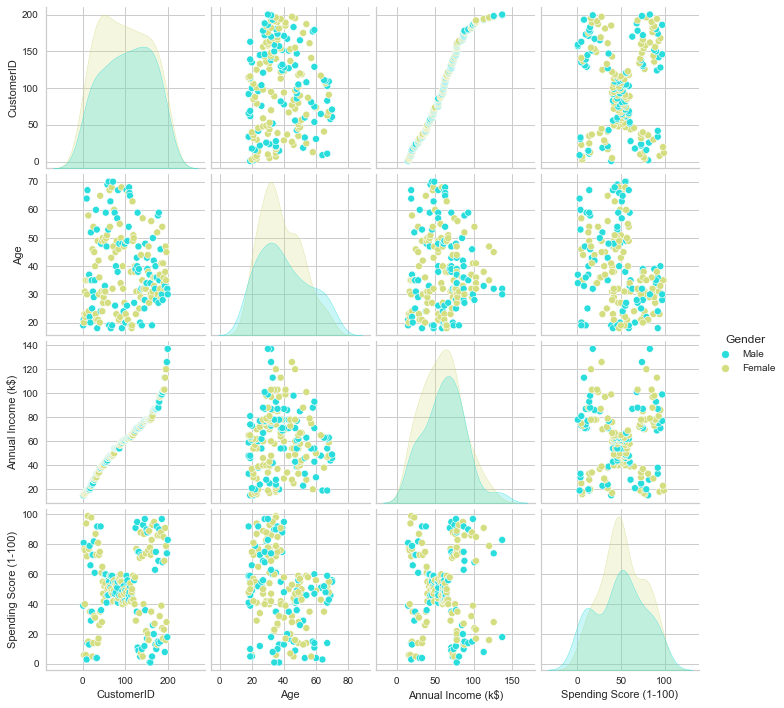

In [11]:
sb.pairplot(df,hue = 'Gender',palette='rainbow')
plt.show()

* The influence of gender on the other cloumns is not significant
* The **male and female are spread** over various ranges in all the **distribution of the numerical data**
* Its not like only men have high income range or female customers only have high spending score
* We can't predict the clusters here, hence we use various clustering algorithm to cluster the data

## Data Preprocessing

### Checking for Null Values

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

* There are no null values in the dataset

In [13]:
### Dropping categorical and unimportant data
data = df.drop(columns=['CustomerID','Gender'])
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


### Normalizing the data

In [14]:
scale = MinMaxScaler()
data = pd.DataFrame(scale.fit_transform(data),columns= data.columns)
data.head(8)

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
5,0.076923,0.016393,0.765306
6,0.326923,0.024590,0.051020
7,0.096154,0.024590,0.948980


* The normalization is done because most of the models in clustering works on the **euclidean distance**
* Hence scaling has to be done

## Creating and Training the models

### K-Means Clustering

* The Main problem with kmeans is that we should know number of clusters to start with the model

### Finding the K value using the Elbow method

In [15]:
def elbow_sil(data):
    err = []
    sil = []
    for i in range(2,11):
        k = KMeans(n_clusters=i,init='k-means++')
        k.fit(data)
        err.append(k.inertia_)
        sil.append(silhouette_score(data,k.labels_))
        si = silhouette_score(data,k.labels_)
        print("For n_clusters =", i,
          "The average silhouette_score is :", si)


    fig,ax = plt.subplots(figsize=(20, 8))
    
    plt.subplot(121)
    plt.plot(range(2,11), err,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.grid(True)
    plt.xlabel('K')
    plt.ylabel('Distorsions')
    plt.title('Elbow curve'); 
    
    # Visualizing the silhouette score
    plt.subplot(122)
    plt.plot(range(2,11),sil,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('Score vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Score')
    
    plt.tight_layout

For n_clusters = 2 The average silhouette_score is : 0.3652498066402899
For n_clusters = 3 The average silhouette_score is : 0.36504262943838
For n_clusters = 4 The average silhouette_score is : 0.392319202055722
For n_clusters = 5 The average silhouette_score is : 0.40611743307078185
For n_clusters = 6 The average silhouette_score is : 0.4234860620777653
For n_clusters = 7 The average silhouette_score is : 0.42493242141407167
For n_clusters = 8 The average silhouette_score is : 0.41754665954350934
For n_clusters = 9 The average silhouette_score is : 0.4282144141108578
For n_clusters = 10 The average silhouette_score is : 0.40454258738812043


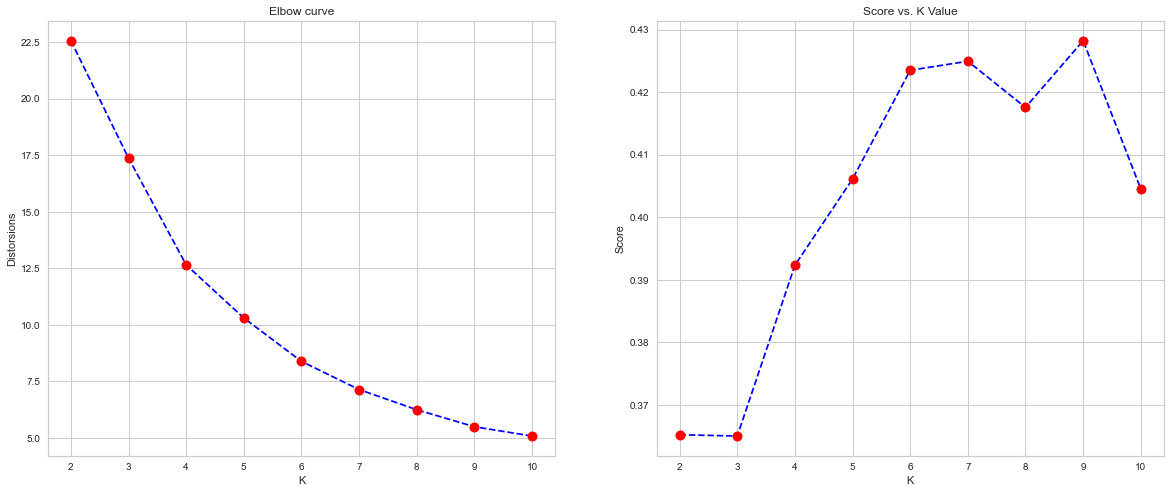

In [16]:
a = elbow_sil(data)
a

#### Checking again with yellowbrick library

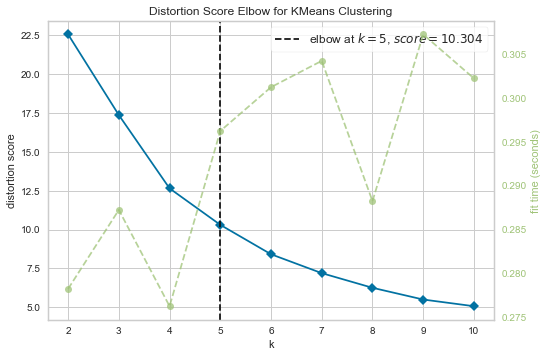

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
el = KElbowVisualizer(KMeans(),k=(2,11))
el.fit(data)
el.show()

#### Fixing clusters = 5 and creating a model

In [18]:
km = KMeans(n_clusters= 5,init='k-means++')

# Fitting the model with the data 
km.fit(data)

KMeans(n_clusters=5)

In [19]:
# Getting the labels
km_lab = km.labels_

# Creating a dataframe for Kmeans
km_pred = data.copy()
km_pred['km_lab'] = km.labels_

km_pred

,Age,Annual Income (k$),Spending Score (1-100),km_lab
0,0.019231,0.000000,0.387755,3
1,0.057692,0.000000,0.816327,4
2,0.038462,0.008197,0.051020,3
3,0.096154,0.008197,0.775510,4
4,0.250000,0.016393,0.397959,3
...,...,...,...,...
195,0.326923,0.860656,0.795918,1
196,0.519231,0.909836,0.275510,0
197,0.269231,0.909836,0.744898,1
198,0.269231,1.000000,0.173469,0


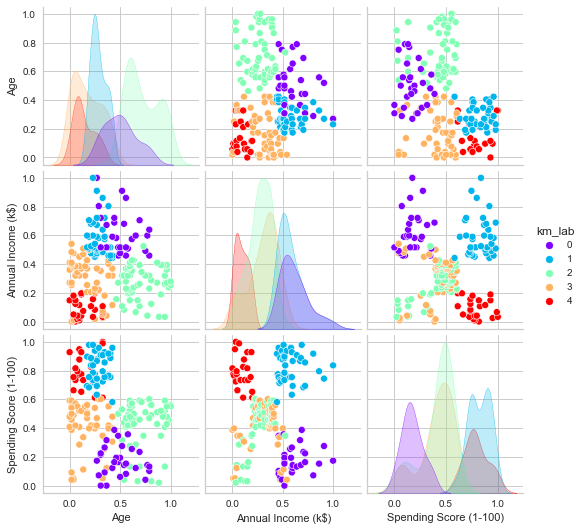

In [20]:
sb.pairplot(km_pred,x_vars=['Age','Annual Income (k$)','Spending Score (1-100)'],y_vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='km_lab',palette='rainbow')
plt.show()

* From the graph we can see that the cluster have formed well for the **age-spend,age-income** but the **income-spend** clusters are bad

### Heirarchical Clustering

### Finding the number of Clusters using Dendrogram 

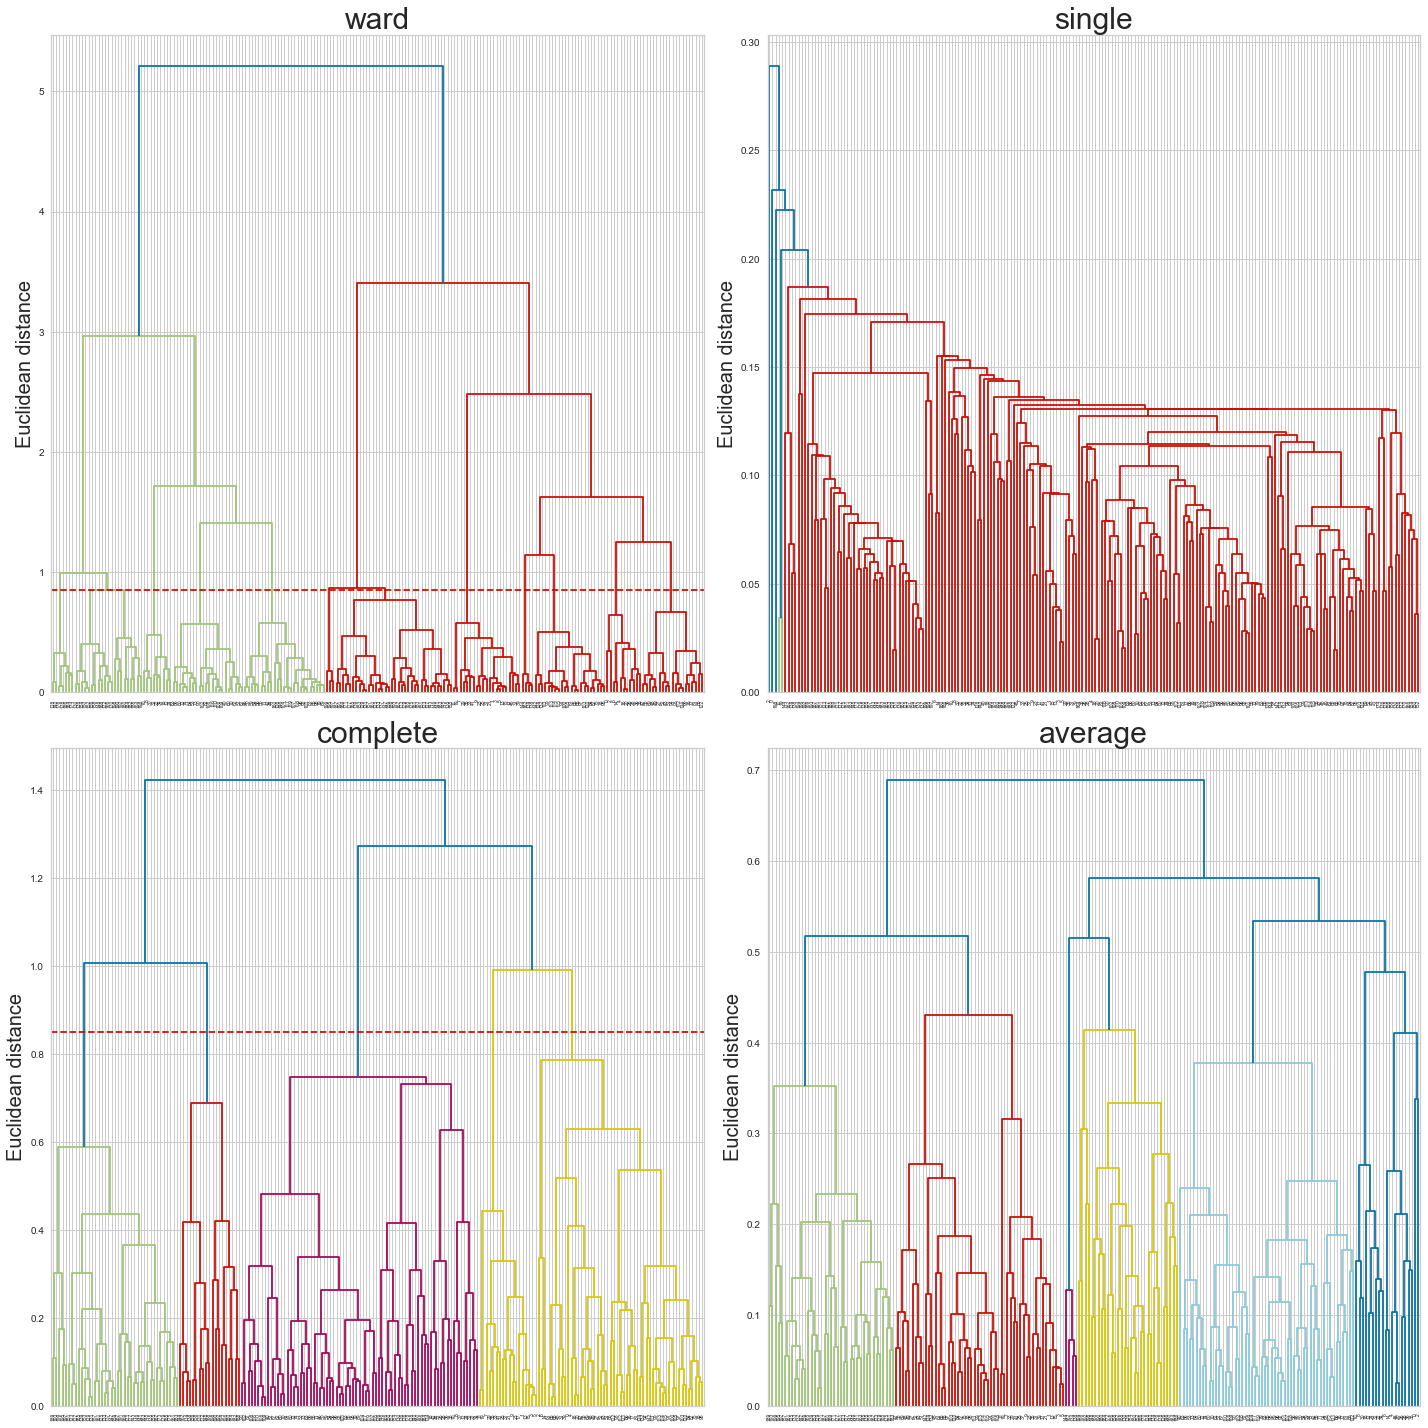

In [21]:
link = ['ward','single','complete','average']

f,ax = plt.subplots(figsize = (20,20))
a = 1
for i in link:
    plt.subplot(2,2,a)
    den = sch.dendrogram(sch.linkage(data,method = i))
    plt.axhline(y = 0.85,linestyle = '--',c = 'r')
    plt.title(f'{i}',fontsize=30)
    plt.ylabel('Euclidean distance', fontsize=20)
    a += 1

plt.tight_layout()
plt.show()

* From the complete method using from the longest line we can set the threshold as **0.85**
* From the threshold 0.9 **5** lines are interesecting the line
* Hence we set clusters = **5**

### Creating the model for the 5 clusters

### Finding the best model among various Linkage method

In [22]:
def best_hc(data,cluster):
    link = ['ward','single','complete','average']
    pred = []
    for i in link:
        m = AgglomerativeClustering(n_clusters=cluster,linkage = i,affinity = 'euclidean')
        p = m.fit_predict(data)
        pred.append(p)
        print(i)
        print(silhouette_score(data,p))
        
    hc_pred = pd.DataFrame({'ward':pred[0],
                            'single':pred[1],
                            'complete':pred[2],
                            'average':pred[3]})
    hc_pred = pd.concat([data,hc_pred],axis = 1)
    
    return(hc_pred)

In [23]:
hc_pred = best_hc(data,5)
hc_pred

ward
0.3955454334726547
single
-0.05044117673605641
complete
0.36141375230238765
average
0.3982883494848387


,Age,Annual Income (k$),Spending Score (1-100),ward,single,complete,average
0,0.019231,0.000000,0.387755,1,2,0,1
1,0.057692,0.000000,0.816327,4,0,4,2
2,0.038462,0.008197,0.051020,1,3,0,1
3,0.096154,0.008197,0.775510,4,0,4,2
4,0.250000,0.016393,0.397959,1,0,0,1
...,...,...,...,...,...,...,...
195,0.326923,0.860656,0.795918,2,0,3,4
196,0.519231,0.909836,0.275510,3,0,1,0
197,0.269231,0.909836,0.744898,2,0,3,4
198,0.269231,1.000000,0.173469,3,4,1,0


ward


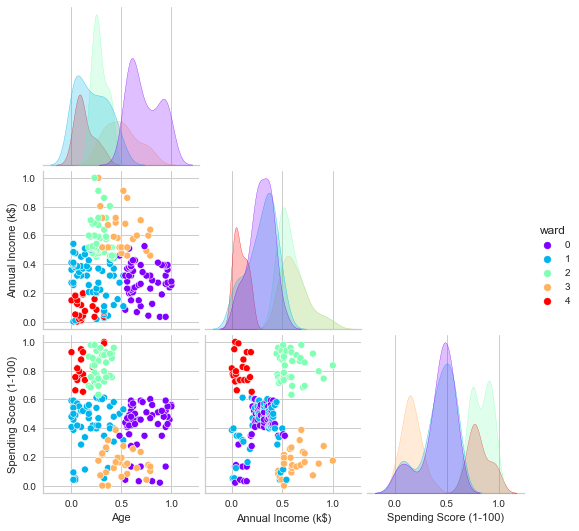

single


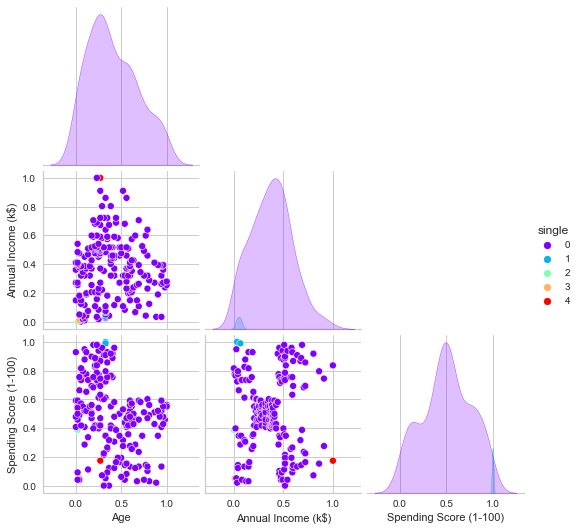

complete


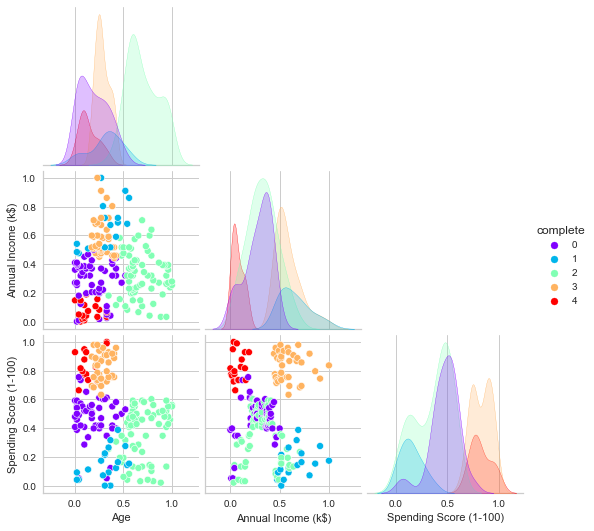

average


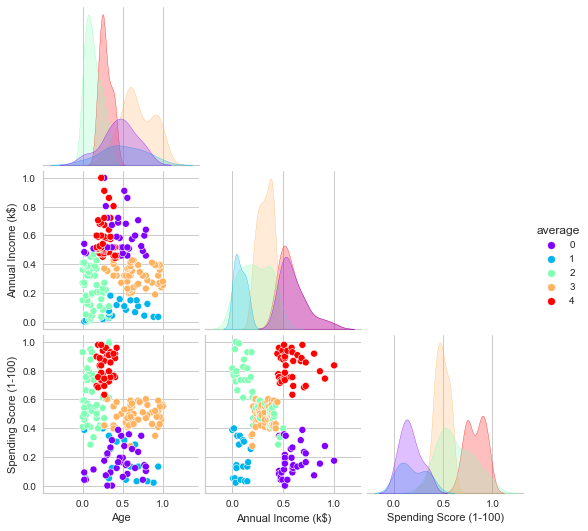

In [24]:
link = ['ward','single','complete','average']
for i in link:
    sb.pairplot(hc_pred,x_vars=['Age','Annual Income (k$)','Spending Score (1-100)'],y_vars=['Age','Annual Income (k$)','Spending Score (1-100)'],
                hue = i,palette='rainbow',corner=True)
    print(i)
    plt.show()

* Both **ward and average** have performed better than other models
* Out of the two linkage method, **average** linkage is better than ward in terms of silhouette_score
* Hence we'll use **Average** linkage model for further analysis

In [25]:
### Creating model for hc (average)

hc = AgglomerativeClustering(n_clusters=5,linkage = 'average',affinity = 'euclidean')
hc_lab = hc.fit_predict(data)
hc_lab

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 4, 2, 4, 0, 4, 0, 4, 0, 4,
       2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int64)

### DBSCAN Clustering

### Finding the best hyperparameters for all features

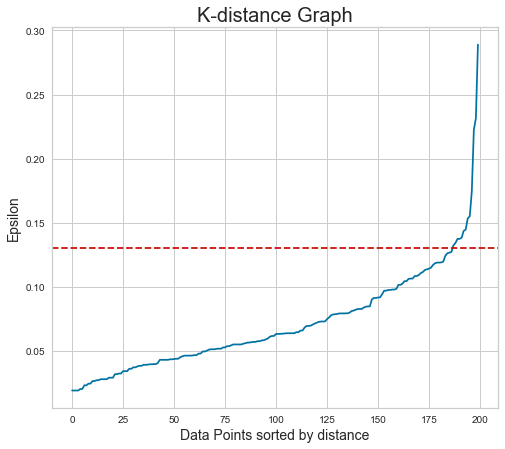

In [26]:
# Plotting the k distance plot

nn = NearestNeighbors(n_neighbors=2).fit(data) 
dist,indx = nn.kneighbors(data)

plt.figure(figsize=(8,7))
distances = np.sort(dist, axis=0)
distance = distances[:,1]
plt.plot(distance)
plt.axhline(y=0.13, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)

plt.show()

In [27]:
# Finding the best min samples
def db_min_sample(data,eps):
    for i in range(2,20):
        db = DBSCAN(eps = eps,min_samples=i)
        labels = db.fit_predict(data)

        labels = labels+2
        y = np.bincount(labels)
        a = np.nonzero(y)[0]
        results = list(zip(a,y[a]) )

        print('eps=',eps,'| min_samples= ', i, '| obtained clustering: ', results)

In [28]:
db_min_sample(data,eps=0.135)

eps= 0.135 | min_samples=  2 | obtained clustering:  [(1, 11), (2, 127), (3, 2), (4, 3), (5, 2), (6, 5), (7, 36), (8, 2), (9, 4), (10, 5), (11, 3)]
eps= 0.135 | min_samples=  3 | obtained clustering:  [(1, 17), (2, 127), (3, 3), (4, 5), (5, 36), (6, 4), (7, 5), (8, 3)]
eps= 0.135 | min_samples=  4 | obtained clustering:  [(1, 28), (2, 112), (3, 5), (4, 35), (5, 12), (6, 4), (7, 4)]
eps= 0.135 | min_samples=  5 | obtained clustering:  [(1, 47), (2, 104), (3, 4), (4, 34), (5, 11)]
eps= 0.135 | min_samples=  6 | obtained clustering:  [(1, 56), (2, 20), (3, 54), (4, 27), (5, 33), (6, 10)]
eps= 0.135 | min_samples=  7 | obtained clustering:  [(1, 62), (2, 19), (3, 49), (4, 29), (5, 32), (6, 9)]
eps= 0.135 | min_samples=  8 | obtained clustering:  [(1, 64), (2, 19), (3, 48), (4, 29), (5, 32), (6, 8)]
eps= 0.135 | min_samples=  9 | obtained clustering:  [(1, 73), (2, 18), (3, 48), (4, 29), (5, 32)]
eps= 0.135 | min_samples=  10 | obtained clustering:  [(1, 77), (2, 16), (3, 48), (4, 27), (5, 

* Hence Keeping the **eps** value as **0.135** from the k-distance graph
* Selecting the **min_samples** as **9** from the above cell

### Building the DBSCAN model with the above hyperparameters

In [29]:
# Creating the model
db = DBSCAN(eps = 0.135,min_samples=9)

# Adding predicted values to predicted dataframe
# Creating a dataframe for Kmeans
db_pred = data.copy()
db_pred['DB'] = db.fit_predict(data)+1

db_pred

,Age,Annual Income (k$),Spending Score (1-100),DB
0,0.019231,0.000000,0.387755,0
1,0.057692,0.000000,0.816327,1
2,0.038462,0.008197,0.051020,0
3,0.096154,0.008197,0.775510,1
4,0.250000,0.016393,0.397959,0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0
196,0.519231,0.909836,0.275510,0
197,0.269231,0.909836,0.744898,0
198,0.269231,1.000000,0.173469,0


### Plotting the DBSCAN cluster

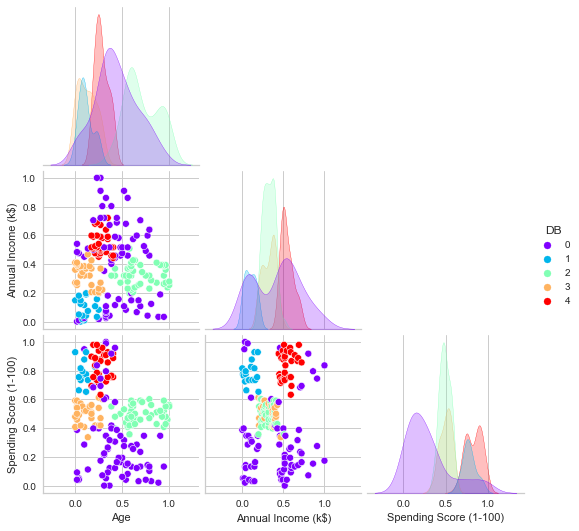

In [30]:

sb.pairplot(db_pred,x_vars=['Age','Annual Income (k$)','Spending Score (1-100)'],y_vars=['Age','Annual Income (k$)','Spending Score (1-100)'],
            hue = 'DB',palette='rainbow',corner=True)
plt.show()

* The DBSCAN works better on **spacial shaped data** 
* Here the model have formed a cluster but **most of data** is being considered as **ouliers**
* Hence we can choose the model between K-means and Hierarchichal clustering

### Dimensinality Reduction with PCA

In [31]:
#PCA
pca = PCA(n_components=2).fit_transform(data)
print(pca.shape)

(200, 2)


In [32]:
pca_df = pd.DataFrame(pca,columns=['Feature1','Feature2'])
pca_df

,Feature1,Feature2
0,-0.192221,0.319683
1,-0.458175,-0.018152
2,0.052562,0.551854
3,-0.402357,-0.014239
4,-0.031648,0.155578
...,...,...
195,-0.264686,-0.131248
196,0.231202,0.118796
197,-0.272601,-0.051514
198,0.117597,0.369754


### K-Means

#### Finding k value 

For n_clusters = 2 The average silhouette_score is : 0.47362694075028583
For n_clusters = 3 The average silhouette_score is : 0.4471487905590196
For n_clusters = 4 The average silhouette_score is : 0.43785291876777566
For n_clusters = 5 The average silhouette_score is : 0.42073038257026807
For n_clusters = 6 The average silhouette_score is : 0.4505837949763747
For n_clusters = 7 The average silhouette_score is : 0.452009225745008
For n_clusters = 8 The average silhouette_score is : 0.410615367878404
For n_clusters = 9 The average silhouette_score is : 0.4178776878185744
For n_clusters = 10 The average silhouette_score is : 0.43395515231136217


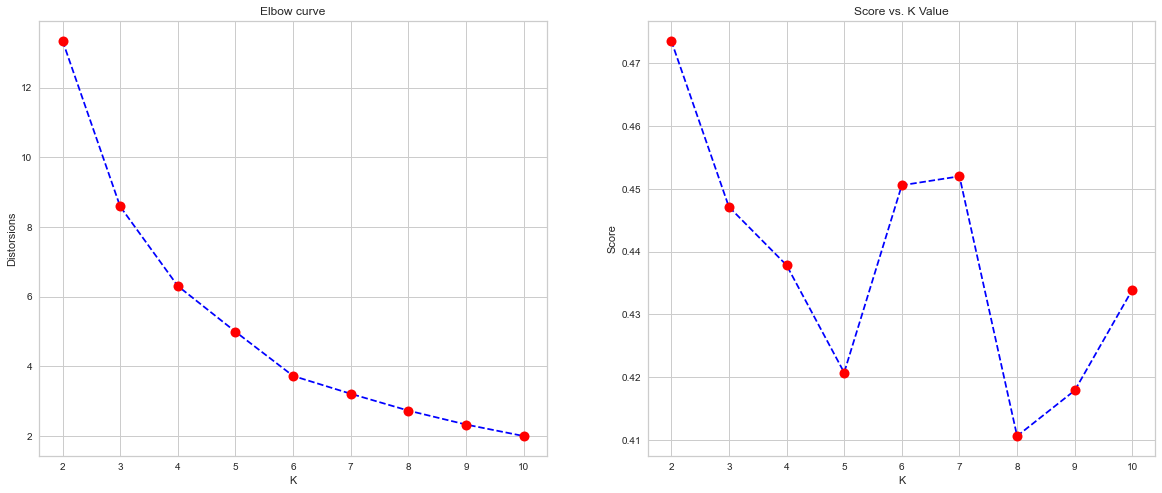

In [33]:
elbow_sil(pca)

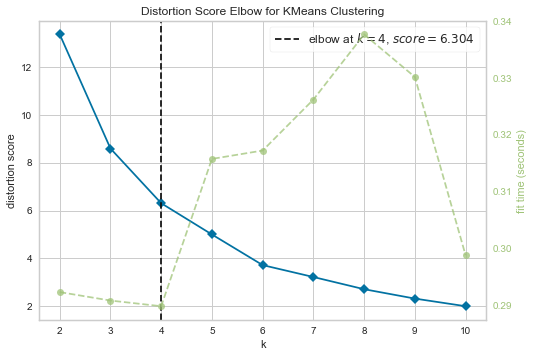

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
el = KElbowVisualizer(KMeans(),k=(2,11))
el.fit(pca)
el.show()

* From the elbow method we are choosing the **cluster** value as **4**

In [35]:
km_pca = KMeans(n_clusters= 4,init='k-means++')

# Fitting the model with the data 
km_pca.fit(pca)

KMeans(n_clusters=4)

In [36]:
# Getting the labels
km_pca_lab = km_pca.labels_
pca_df['KM'] = km_pca_lab
pca_df

,Feature1,Feature2,KM
0,-0.192221,0.319683,3
1,-0.458175,-0.018152,1
2,0.052562,0.551854,3
3,-0.402357,-0.014239,1
4,-0.031648,0.155578,3
...,...,...,...
195,-0.264686,-0.131248,1
196,0.231202,0.118796,0
197,-0.272601,-0.051514,1
198,0.117597,0.369754,3


Sil = 0.43785291876777566


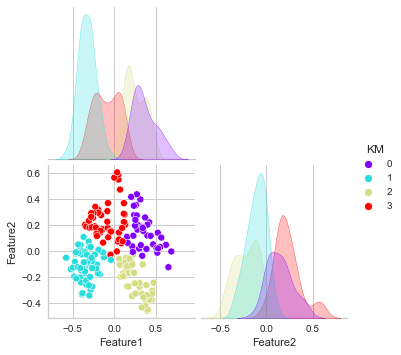

In [37]:
print(f'Sil = {silhouette_score(pca,km_pca_lab)}')
sb.pairplot(pca_df,hue='KM',palette='rainbow',corner=True)
plt.show()

* The cluster formed from the **KMeans** is very good for the **PCA data**
* There is well defined boundry between the clusters
* The **silhouette_score** is about 0.438

### Heirarchichal Clustering

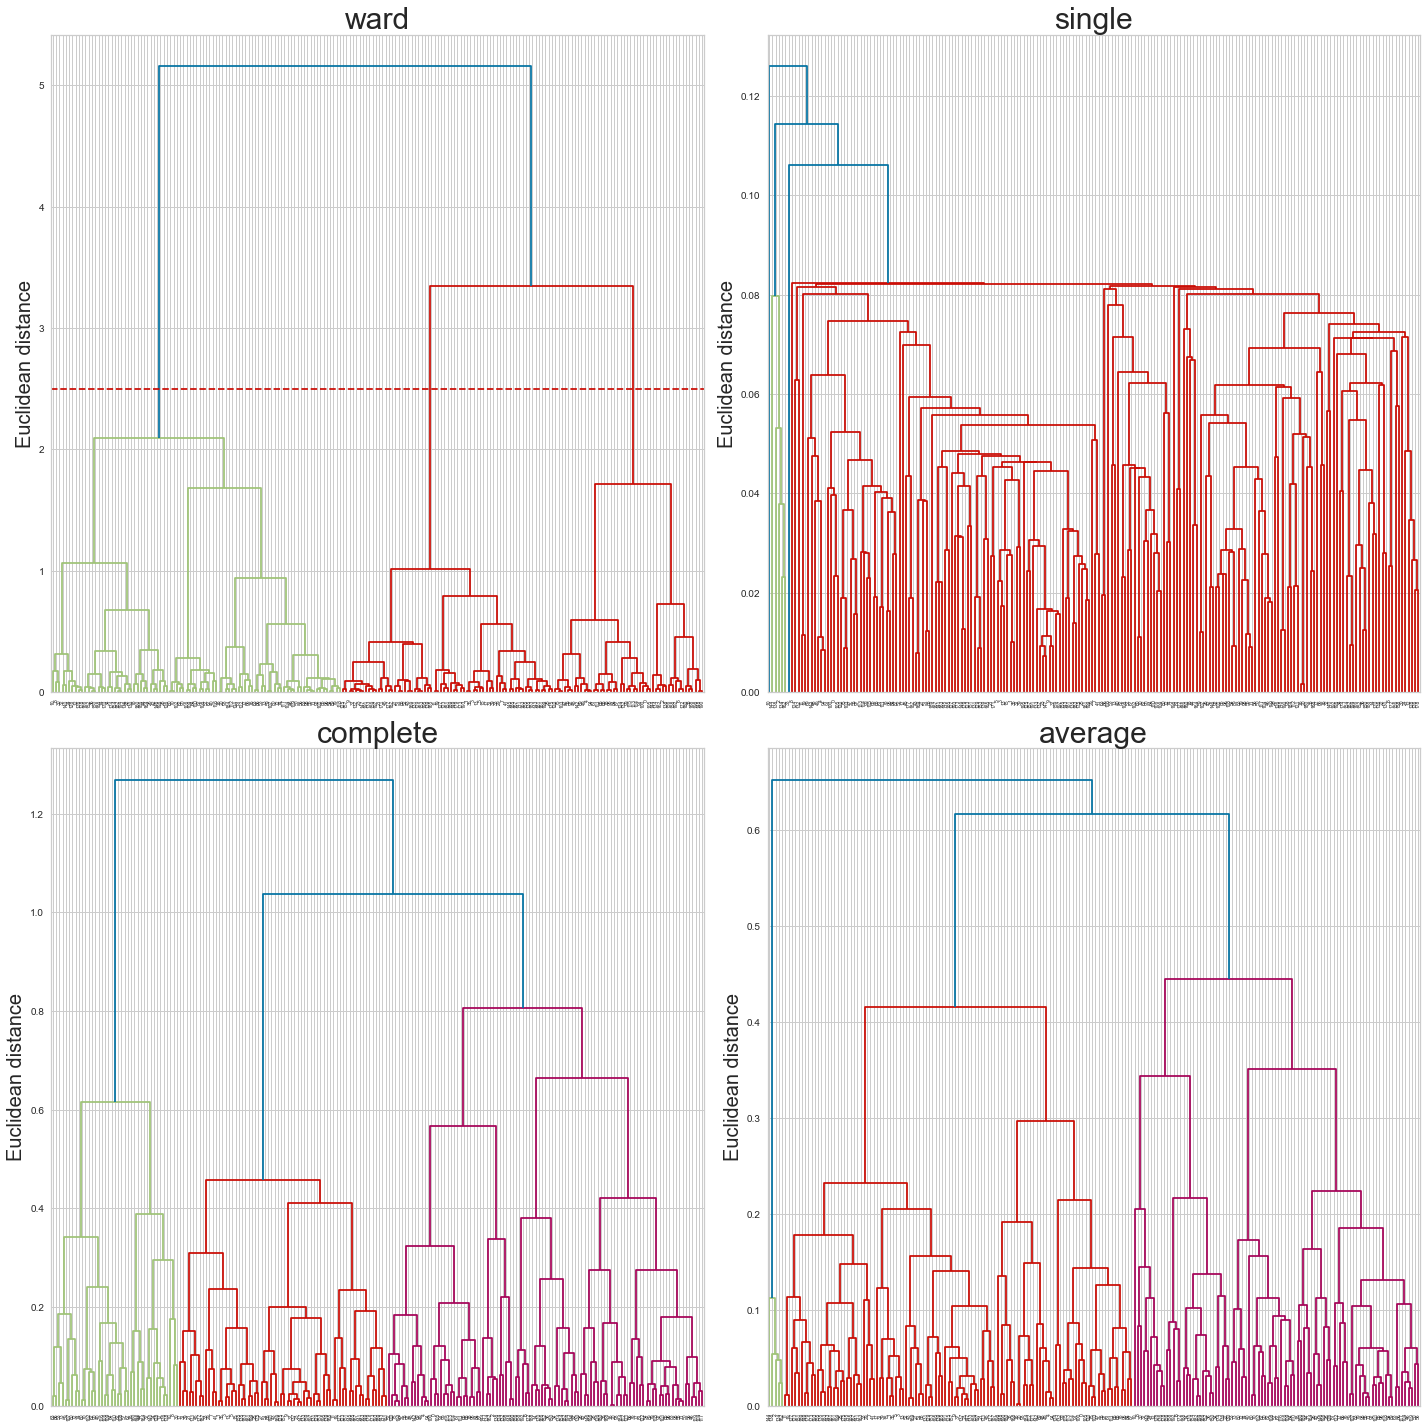

In [38]:
link = ['ward','single','complete','average']

f,ax = plt.subplots(figsize = (20,20))
a = 1
for i in link:
    plt.subplot(2,2,a)
    den = sch.dendrogram(sch.linkage(pca,method = i))
    plt.axhline(y = 2.5,linestyle = '--',c = 'r')
    plt.title(f'{i}',fontsize=30)
    plt.ylabel('Euclidean distance', fontsize=20)
    a += 1

plt.tight_layout()
plt.show()

* Taking the **clusters = 3** from ward method

### Finding the best Models among various linkage methods

In [39]:
def best_hc(data,cluster):
    link = ['ward','single','complete','average']
    pred = []
    for i in link:
        m = AgglomerativeClustering(n_clusters=cluster,linkage = i,affinity = 'euclidean')
        p = m.fit_predict(data)
        pred.append(p)
        print(i)
        print(silhouette_score(data,p))
        
    hc_pred = pd.DataFrame({'ward':pred[0],
                            'single':pred[1],
                            'complete':pred[2],
                            'average':pred[3]})
    hc_pred = pd.concat([data,hc_pred],axis = 1)
    
    return(hc_pred)

In [40]:
hc_pca = best_hc(pca_df.drop(columns='KM'),3)
hc_pca

ward
0.4324834550741474
single
0.08876286176806028
complete
0.36202480204408116
average
0.3928546577182263


,Feature1,Feature2,ward,single,complete,average
0,-0.192221,0.319683,1,0,0,2
1,-0.458175,-0.018152,2,0,2,2
2,0.052562,0.551854,1,2,0,1
3,-0.402357,-0.014239,2,0,2,2
4,-0.031648,0.155578,1,0,0,2
...,...,...,...,...,...,...
195,-0.264686,-0.131248,2,0,2,2
196,0.231202,0.118796,0,0,0,0
197,-0.272601,-0.051514,2,0,2,2
198,0.117597,0.369754,1,0,0,2


ward


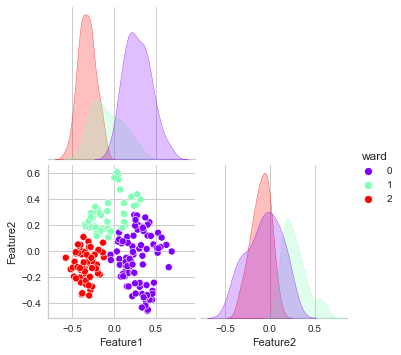

single


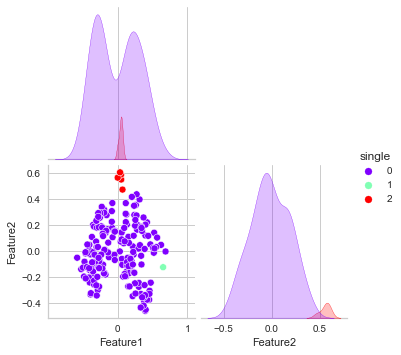

complete


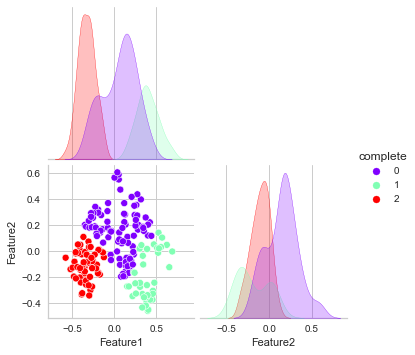

average


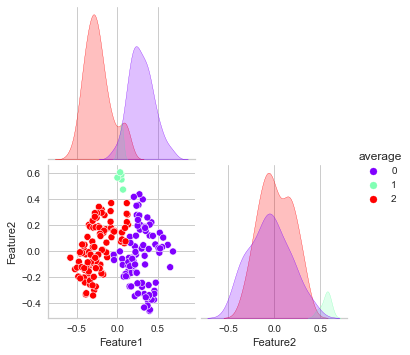

In [41]:
link = ['ward','single','complete','average']
for i in link:
    sb.pairplot(hc_pca,x_vars=['Feature1','Feature2'],y_vars=['Feature1','Feature2'],
                hue = i,palette='rainbow',corner=True)
    print(i)
    plt.show()

* The **best clusters** formed are from the **ward and complete linkage** 
* Out of the two model **ward model** has good clusters **than complete**

## Comparing all the models

#### Converting the Scaled data back to Normal data

In [42]:
data_pred = pd.DataFrame(scale.inverse_transform(data),columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
data_pred

,Age,Annual Income (k$),Spending Score (1-100)
0,19.0,15.0,39.0
1,21.0,15.0,81.0
2,20.0,16.0,6.0
3,23.0,16.0,77.0
4,31.0,17.0,40.0
...,...,...,...
195,35.0,120.0,79.0
196,45.0,126.0,28.0
197,32.0,126.0,74.0
198,32.0,137.0,18.0


#### Adding all the predicted data into single dataframe

In [43]:
data_pred['KM'] = km.labels_
data_pred['HC'] = hc.labels_
data_pred['DB'] = db.labels_+1

data_pred

,Age,Annual Income (k$),Spending Score (1-100),KM,HC,DB
0,19.0,15.0,39.0,3,1,0
1,21.0,15.0,81.0,4,2,1
2,20.0,16.0,6.0,3,1,0
3,23.0,16.0,77.0,4,2,1
4,31.0,17.0,40.0,3,1,0
...,...,...,...,...,...,...
195,35.0,120.0,79.0,1,4,0
196,45.0,126.0,28.0,0,0,0
197,32.0,126.0,74.0,1,4,0
198,32.0,137.0,18.0,0,0,0


#### Normal Data set


* Lets consider **Annual income and Spending score** and find the best cluster for various models and provide names for the labels

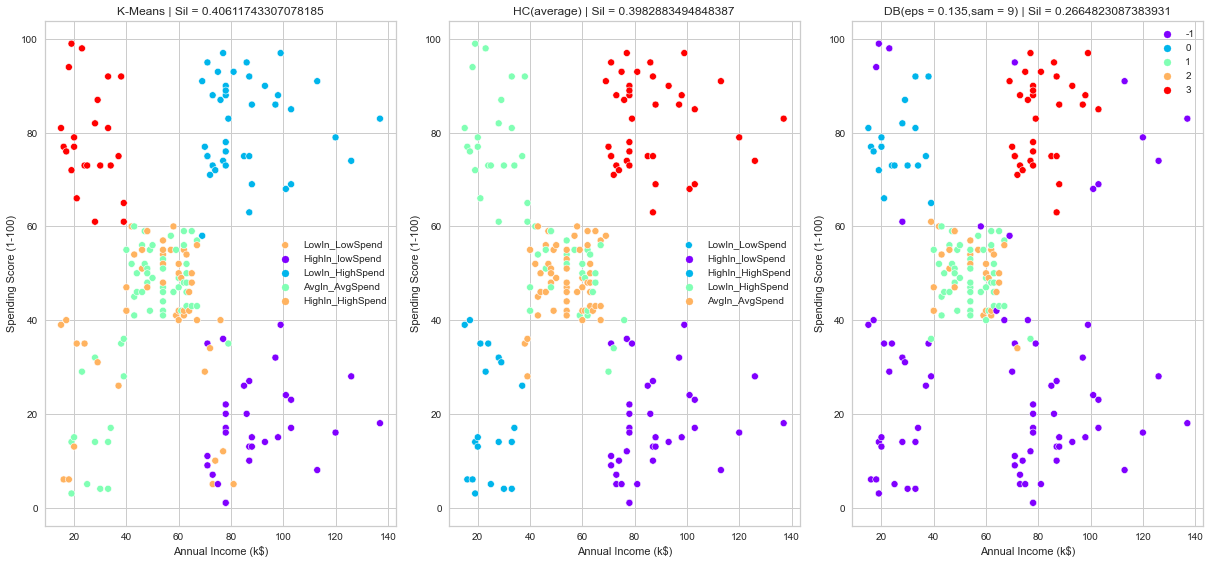

In [44]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (17,8))

# Kmeans
sb.scatterplot(data=data_pred,x='Annual Income (k$)',y = 'Spending Score (1-100)',hue = km.labels_, hue_order=[4,3,2,1,0],palette = 'rainbow',legend = True,ax = ax1)
ax1.set_title(f'K-Means | Sil = {silhouette_score(data,km.labels_)}')
ax1.legend(['LowIn_LowSpend','HighIn_lowSpend','LowIn_HighSpend','AvgIn_AvgSpend','HighIn_HighSpend'])

# HC
sb.scatterplot(data=data_pred,x='Annual Income (k$)',y = 'Spending Score (1-100)',hue = hc.labels_, hue_order=[4,3,2,1,0], palette = 'rainbow',legend = True,ax = ax2)
ax2.set_title(f'HC(average) | Sil = {silhouette_score(data,hc.labels_)}')
ax2.legend(['LowIn_LowSpend','HighIn_lowSpend','HighIn_HighSpend','LowIn_HighSpend','AvgIn_AvgSpend'])

# DB
sb.scatterplot(data=data_pred,x='Annual Income (k$)',y = 'Spending Score (1-100)',hue = db.labels_, palette = 'rainbow',legend = True,ax = ax3)
ax3.set_title(f'DB(eps = 0.135,sam = 9) | Sil = {silhouette_score(data,db.labels_)}')

plt.tight_layout()
plt.show()

* Lets Consider the age and spending score to compare the models


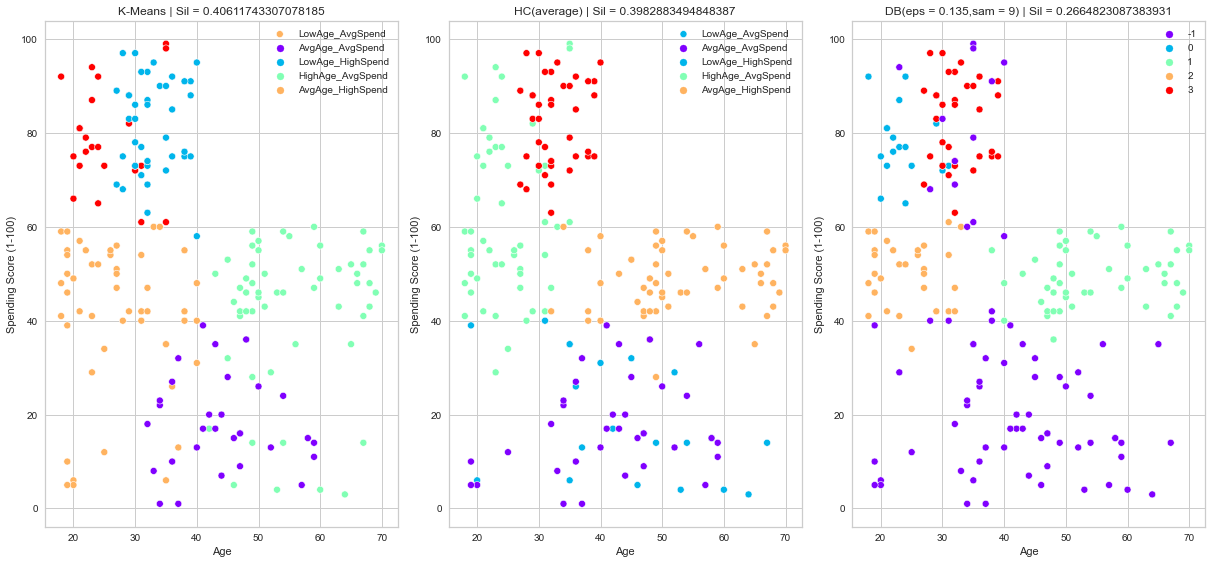

In [45]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (17,8))

# Kmeans
sb.scatterplot(data=data_pred,x='Age',y = 'Spending Score (1-100)',hue = km.labels_, hue_order=[4,3,2,1,0],palette = 'rainbow',legend = True,ax = ax1)
ax1.set_title(f'K-Means | Sil = {silhouette_score(data,km.labels_)}')
ax1.legend(['LowAge_AvgSpend','AvgAge_AvgSpend','LowAge_HighSpend','HighAge_AvgSpend','AvgAge_HighSpend'])

# HC
sb.scatterplot(data=data_pred,x='Age',y = 'Spending Score (1-100)',hue = hc.labels_, hue_order=[4,3,2,1,0], palette = 'rainbow',legend = True,ax = ax2)
ax2.set_title(f'HC(average) | Sil = {silhouette_score(data,hc.labels_)}')
ax2.legend(['LowAge_AvgSpend','AvgAge_AvgSpend','LowAge_HighSpend','HighAge_AvgSpend','AvgAge_HighSpend'])

# DB
sb.scatterplot(data=data_pred,x='Age',y = 'Spending Score (1-100)',hue = db.labels_, palette = 'rainbow',legend = True,ax = ax3)
ax3.set_title(f'DB(eps = 0.135,sam = 9) | Sil = {silhouette_score(data,db.labels_)}')

plt.tight_layout()
plt.show()

### Now Giving the labels to the predicted data set

In [46]:
x = data_pred.iloc[:,[0,1,2]].values
x

array([[ 19.,  15.,  39.],
       [ 21.,  15.,  81.],
       [ 20.,  16.,   6.],
       [ 23.,  16.,  77.],
       [ 31.,  17.,  40.],
       [ 22.,  17.,  76.],
       [ 35.,  18.,   6.],
       [ 23.,  18.,  94.],
       [ 64.,  19.,   3.],
       [ 30.,  19.,  72.],
       [ 67.,  19.,  14.],
       [ 35.,  19.,  99.],
       [ 58.,  20.,  15.],
       [ 24.,  20.,  77.],
       [ 37.,  20.,  13.],
       [ 22.,  20.,  79.],
       [ 35.,  21.,  35.],
       [ 20.,  21.,  66.],
       [ 52.,  23.,  29.],
       [ 35.,  23.,  98.],
       [ 35.,  24.,  35.],
       [ 25.,  24.,  73.],
       [ 46.,  25.,   5.],
       [ 31.,  25.,  73.],
       [ 54.,  28.,  14.],
       [ 29.,  28.,  82.],
       [ 45.,  28.,  32.],
       [ 35.,  28.,  61.],
       [ 40.,  29.,  31.],
       [ 23.,  29.,  87.],
       [ 60.,  30.,   4.],
       [ 21.,  30.,  73.],
       [ 53.,  33.,   4.],
       [ 18.,  33.,  92.],
       [ 49.,  33.,  14.],
       [ 21.,  33.,  81.],
       [ 42.,  34.,  17.],
 

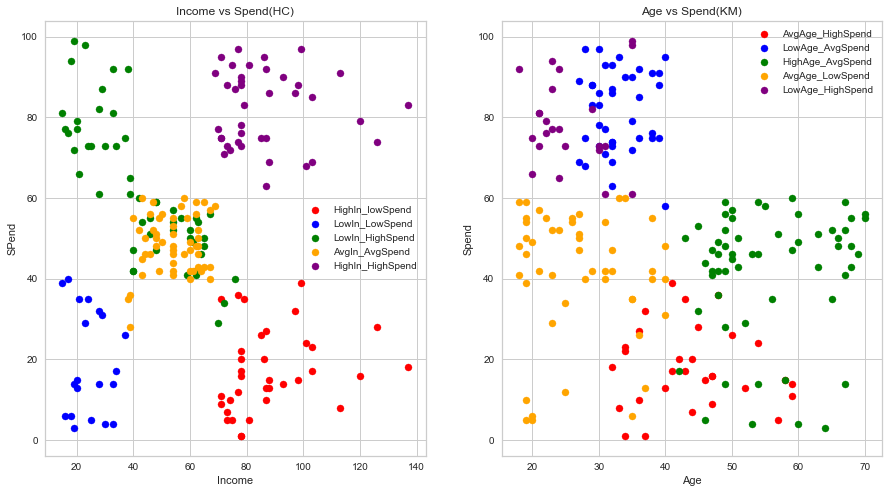

In [47]:
fig,ax = plt.subplots(1,2,figsize = (15,8))


# Income vs Spend
plt.subplot(121)
plt.scatter(x[hc.labels_ == 0,1],x[hc.labels_== 0,2], s = 50, c = 'red', label = 'HighIn_lowSpend')
plt.scatter(x[hc.labels_ == 1,1],x[hc.labels_== 1,2], s = 50, c = 'blue', label = 'LowIn_LowSpend')
plt.scatter(x[hc.labels_ == 2,1],x[hc.labels_== 2,2], s = 50, c = 'Green', label = 'LowIn_HighSpend')
plt.scatter(x[hc.labels_ == 3,1],x[hc.labels_== 3,2], s = 50, c = 'orange', label = 'AvgIn_AvgSpend')
plt.scatter(x[hc.labels_ == 4,1],x[hc.labels_== 4,2], s = 50, c = 'purple', label = 'HighIn_HighSpend')
plt.title('Income vs Spend(HC)')
plt.xlabel('Income')
plt.ylabel('SPend')
plt.legend()

# Age vs Spend
plt.subplot(122)
plt.scatter(x[km.labels_ == 0,0],x[km.labels_== 0,2], s = 50, c = 'red', label = 'AvgAge_HighSpend')
plt.scatter(x[km.labels_ == 1,0],x[km.labels_== 1,2], s = 50, c = 'blue', label = 'LowAge_AvgSpend')
plt.scatter(x[km.labels_ == 2,0],x[km.labels_== 2,2], s = 50, c = 'Green', label = 'HighAge_AvgSpend')
plt.scatter(x[km.labels_ == 3,0],x[km.labels_== 3,2], s = 50, c = 'orange', label = 'AvgAge_LowSpend')
plt.scatter(x[km.labels_ == 4,0],x[km.labels_== 4,2], s = 50, c = 'purple', label = 'LowAge_HighSpend')

plt.title('Age vs Spend(KM)')
plt.xlabel('Age')
plt.ylabel('Spend')
plt.legend()

plt.legend()
plt.show()

#### Giving the name for labels we got using the Kmeans

In [48]:
data_pred.loc[data_pred.KM == 0,'KM_age_name'] = 'AvgAge_HighSpend'
data_pred.loc[data_pred.KM == 1,'KM_age_name'] = 'LowAge_AvgSpend'
data_pred.loc[data_pred.KM == 2,'KM_age_name'] = 'HighAge_AvgSpend'
data_pred.loc[data_pred.KM == 3,'KM_age_name'] = 'AvgAge_LowSpend'
data_pred.loc[data_pred.KM == 4,'KM_age_name'] = 'LowAge_HighSpend'

In [49]:
data_pred.loc[data_pred.HC == 0,'HC_Income_name'] = 'HighIn_lowSpend'
data_pred.loc[data_pred.HC == 1,'HC_Income_name'] = 'LowIn_LowSpend'
data_pred.loc[data_pred.HC == 2,'HC_Income_name'] = 'LowIn_HighSpend'
data_pred.loc[data_pred.HC == 3,'HC_Income_name'] = 'AvgIn_AvgSpend'
data_pred.loc[data_pred.HC == 4,'HC_Income_name'] = 'HighIn_HighSpend'

In [50]:
data_pred

,Age,Annual Income (k$),Spending Score (1-100),KM,HC,DB,KM_age_name,HC_Income_name
0,19.0,15.0,39.0,3,1,0,AvgAge_LowSpend,LowIn_LowSpend
1,21.0,15.0,81.0,4,2,1,LowAge_HighSpend,LowIn_HighSpend
2,20.0,16.0,6.0,3,1,0,AvgAge_LowSpend,LowIn_LowSpend
3,23.0,16.0,77.0,4,2,1,LowAge_HighSpend,LowIn_HighSpend
4,31.0,17.0,40.0,3,1,0,AvgAge_LowSpend,LowIn_LowSpend
...,...,...,...,...,...,...,...,...
195,35.0,120.0,79.0,1,4,0,LowAge_AvgSpend,HighIn_HighSpend
196,45.0,126.0,28.0,0,0,0,AvgAge_HighSpend,HighIn_lowSpend
197,32.0,126.0,74.0,1,4,0,LowAge_AvgSpend,HighIn_HighSpend
198,32.0,137.0,18.0,0,0,0,AvgAge_HighSpend,HighIn_lowSpend


* The above mentioned data is labelled based on how well the clusters have formed with the Features
* For **age-Spend** the label is given from the **KMeans**
* For **Income-Spend** the label is given from the **HC**

### Interpretation

**For Normal Data**

* From the analysis for some features certain models perform better and gives better clusters than other models
* For **age-spend** & **age-Income** the clusters are better in **KMeans**
* For **Income-Spend** the clusters are better in **HC(average)**
* When compared wth the **silhouette_score Kmeans performs better than HC**

**For PCA Data** 

* Both the models have better clustering for the PCA data
* Out of KMeans and HC **KMeans have more silhouette_score than the HC**
* Hence we can say the **best model for the PCA is KMeans**